# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [4]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [14]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [15]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [16]:
import time
URL = 'https://api.hh.ru/vacancies?search_period=30'
params = [{'text': "повар",'area' : 1, 'per_page' : 50},
 {'text':"косметолог", 'area' : 1, 'per_page' : 50},
 {'text' : "ml engineer", 'area' : 1, 'per_page' : 50},
 {"text": "бизнес аналитик", "area" : 1, 'per_page' : 50},
 {"text":"грузчик", "area" : 2, 'per_page': 50}]
data_profession = {"повар" : [], 
                   "косметолог" : [],
                   "ml engineer" : [],
                   "бизнес аналитик" : [],
                   "грузчик": []}
cnt_pages_max = 100
for i in range(len(params)):
    for number_pages in range(cnt_pages_max):
        params[i]['page'] = f"{number_pages}"
        req = requests.get(URL, params[i]).json()
        time.sleep(0.1)
        if 'items' not in req or req['items'] == []:
          break
        for x in req['items']:
            data_profession.setdefault(params[i]['text'], []).append({"name": x["name"],
                                                                      "area" : x["area"],
                                                                      "address" : x["address"],
                                                                      "employer" : x["employer"]["name"]})
print('Вакансии:')
[i for i in data_profession.keys()]


Вакансии:


['повар', 'косметолог', 'ml engineer', 'бизнес аналитик', 'грузчик']

(1 балл) Посчитайте сколько всего найдено вакансий:

In [18]:
for i in data_profession.keys():
 print(f"По специальности {i} найдено {len(data_profession[i])} вакансий")


По специальности повар найдено 2000 вакансий
По специальности косметолог найдено 1510 вакансий
По специальности ml engineer найдено 223 вакансий
По специальности бизнес аналитик найдено 2000 вакансий
По специальности грузчик найдено 1024 вакансий


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [19]:
class Company:
    def __init__(self, category, pattern):
      self.is_coords = False
      self.company_name = pattern['employer']
      if 'address' in pattern and pattern['address'] != None:
        if 'lat' in pattern['address'] and pattern['address']['lat'] != None:
          self.coords = (pattern['address']['lat'], pattern['address']['lng'])
          self.is_coords = True
      self.category = category
      self.name_vacancy = pattern['name']
    def have_coords(self):
      return self.is_coords
    def category(self):
      return self.category


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [26]:
company_data = []
for name_category, vacancy_array in data_profession.items():
    if name_category == None:
      continue
    for vacancy in vacancy_array:
      if vacancy == None:
        continue
      company_data.append(Company(name_category, vacancy))


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [27]:
cnt_vacancy_with_coords = {"повар" : 0, 
                   "косметолог" : 0,
                   "ml engineer" : 0,
                   "бизнес аналитик" : 0,
                   "грузчик": 0}
for company in company_data:
  if company.have_coords():
    cnt_vacancy_with_coords[company.category] = cnt_vacancy_with_coords.get(company.category, 0) + 1
for i in cnt_vacancy_with_coords.keys():
  print(f"{i} содержит {cnt_vacancy_with_coords[i]} вакансий с заданными координатами")

повар содержит 1520 вакансий с заданными координатами
косметолог содержит 1203 вакансий с заданными координатами
ml engineer содержит 82 вакансий с заданными координатами
бизнес аналитик содержит 1066 вакансий с заданными координатами
грузчик содержит 814 вакансий с заданными координатами


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [2]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 149MB/s]


Создадим DataFrame:

In [5]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [5]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [6]:
# your code here
diamonds.shape[0]


219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [7]:
# your code here
max_price = diamonds['total_sales_price'].max()
min_price = diamonds['total_sales_price'].min()

max_index = diamonds['total_sales_price'].idxmax()
min_index = diamonds['total_sales_price'].idxmin()

print("Максимальная цена: №{} - {}$".format(max_index, max_price))
print("Минимальная цена: №{} - {}$".format(min_index, min_price))

Максимальная цена: №219702 - 1449881$
Минимальная цена: №0 - 200$


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [8]:
num_missing = (diamonds.isna() | diamonds.eq('unknown')).sum().sum()
print("Количество пропусков в датасете: ", num_missing)


Количество пропусков в датасете:  1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [9]:
# your code here
columns_with_missing = diamonds.columns[diamonds.isna().any() | diamonds.eq('unknown').any()].tolist()
print("Столбцы с пропусками: ", columns_with_missing)


Столбцы с пропусками:  ['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [10]:
fancy_color_cols = diamonds.filter(regex='^fancy_color_').shape[1]
fluor_cols = diamonds.filter(regex='^fluor_').shape[1]

print("Количество колонок, начинающихся с fancy_color_: ", fancy_color_cols)
print("Количество колонок, начинающихся с fluor_: ", fluor_cols)


Количество колонок, начинающихся с fancy_color_:  4
Количество колонок, начинающихся с fluor_:  2


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [11]:
fancy_color_cols = diamonds.filter(regex='^fancy_color_')
fancy_color_non_missing = fancy_color_cols[fancy_color_cols.notna()].count().sum()

print("Количество информативных значений в столбцах, начинающихся с fancy_color_: ", fancy_color_non_missing)


Количество информативных значений в столбцах, начинающихся с fancy_color_:  878812


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [12]:
diamonds.drop(columns=diamonds.columns[diamonds.columns.str.startswith('fancy_color_') | diamonds.columns.str.startswith('fluor_')], inplace=True)


In [13]:
diamonds.shape

(219703, 20)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [14]:
diamonds.drop(columns=diamonds.columns[diamonds.columns.str.startswith('culet_')], inplace=True)


In [15]:
diamonds.shape

(219703, 18)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [16]:
total_price = diamonds['total_sales_price'].sum() / 1000
print(f'Стоимость сейфа с бриллиантами: {total_price} тыс. долларов')


Стоимость сейфа с бриллиантами: 1517721.991 тыс. долларов


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [17]:
even_rows = diamonds[::2]
even_rows


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [18]:
# your code here
rows_multiple_of_6 = diamonds[::6]
rows_multiple_of_6


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [19]:
# your code here
categorical_features = diamonds.select_dtypes(include='object')
categorical_features


,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [20]:
price_col = diamonds['total_sales_price']
price_col_t = price_col.transpose()

matrix = price_col.dot(price_col_t)

print(matrix)

158540672665477


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [21]:
sns.set()

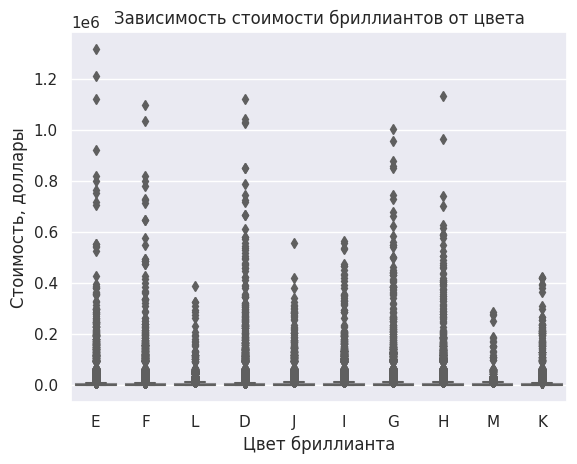

In [24]:
diamonds_clean = diamonds[(diamonds['color'] != 'unknown')]
# diamonds_clean = diamonds.dropna(subset=['color', 'total_sales_price'])

fig, ax = plt.subplots()

sns.boxplot(data=diamonds_clean, x='color', y='total_sales_price', ax=ax, palette='Set3', 
            boxprops={'facecolor': 'white', 'alpha': 0.7})
ax.set_title('Зависимость стоимости бриллиантов от цвета')
ax.set_xlabel('Цвет бриллианта')
ax.set_ylabel('Стоимость, доллары')

plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

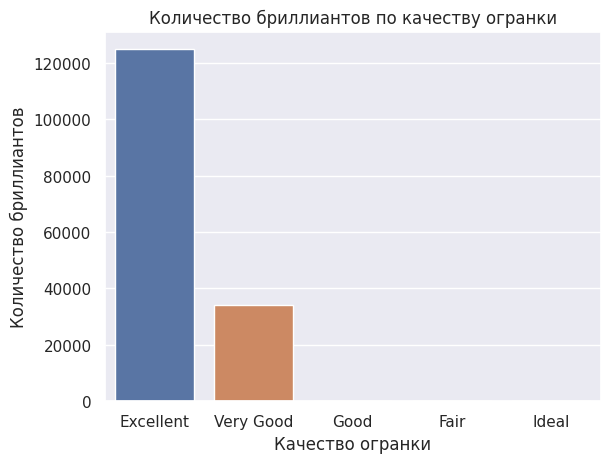

In [25]:

diamonds_clean = diamonds[(diamonds['cut_quality'] != 'unknown')]

sns.countplot(data=diamonds_clean, x='cut_quality')
plt.title('Количество бриллиантов по качеству огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Количество бриллиантов')
plt.show()


(2 балла) Постройте график `вес бриллианта - стоимость`:

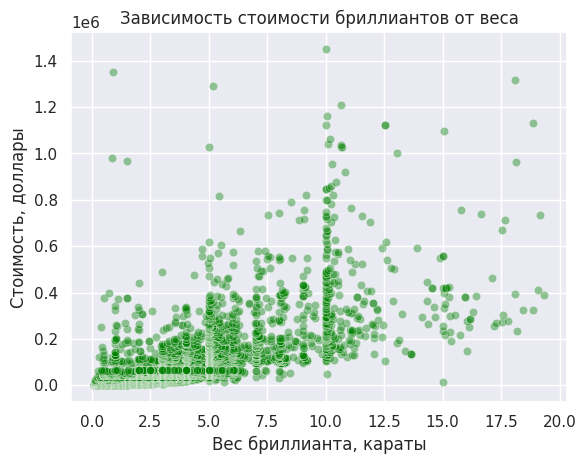

In [26]:
# your code here
import matplotlib.pyplot as plt
diamonds_clean = diamonds.dropna(subset=['carat_weight', 'total_sales_price'])
sns.scatterplot(data=diamonds_clean, x='carat_weight', y='total_sales_price', color='green', alpha=0.4)
plt.title('Зависимость стоимости бриллиантов от веса')
plt.xlabel('Вес бриллианта, караты')
plt.ylabel('Стоимость, доллары')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

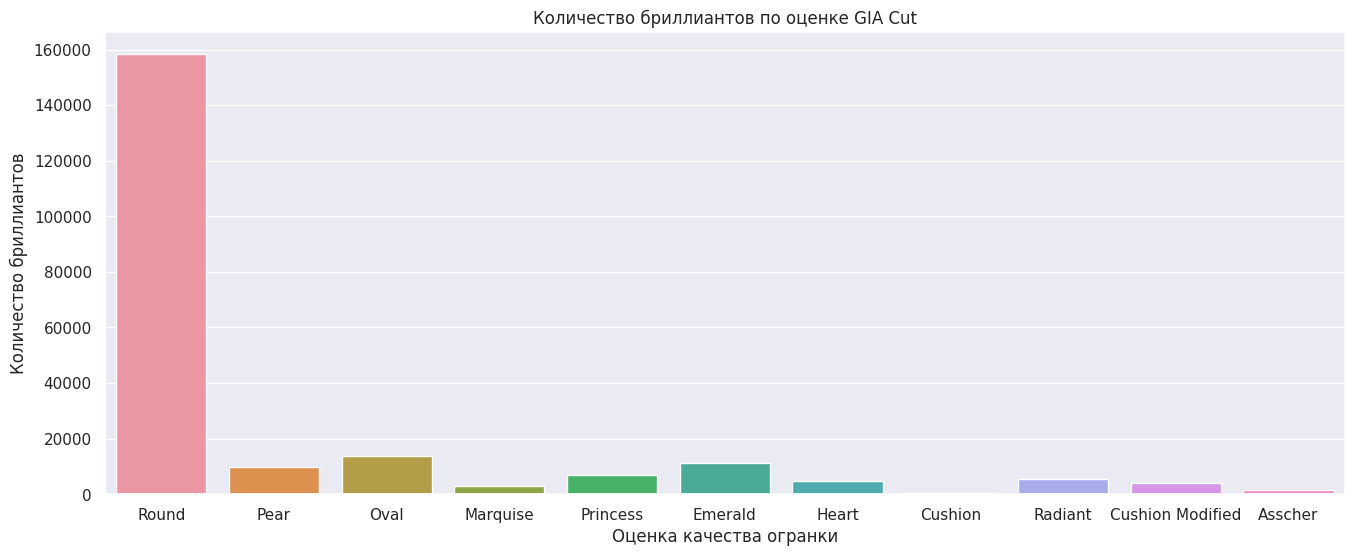

In [27]:
diamonds_clean = diamonds.dropna(subset=['cut', 'total_sales_price'])
diamonds_clean = diamonds[(diamonds['cut'] != 'unknown')]
plt.figure(figsize=(16,6))
sns.countplot(data=diamonds_clean, x='cut')
plt.title('Количество бриллиантов по оценке GIA Cut')
plt.xlabel('Оценка качества огранки')
plt.ylabel('Количество бриллиантов')
plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Графики, полученные из данного датасета, дают нам возможность сделать несколько выводов. Например, мы можем установить, что идеальных бриллиантов в данном датасете нет, однако большинство бриллиантов имеют отличное качество, поэтому имеет смысл рассматривать только такие бриллианты в выборках.

График зависимости стоимости от веса бриллианта показывает экспоненциальную зависимость с каким-то коэффициентом в показателе степени. 

График зависимости цвета бриллианта от его стоимости показывает, что все бриллианты распределены по ценовой шкале примерно равномерно, хотя есть единичные случаи, которые выделяются из общей массы.

График системы оценки GIA Cut показывает, что наиболее распространенным типом огранки является тип "Round", поэтому для этого типа огранки установление зависимости может быть наиболее оптимальным решением.

В целом, графики помогают нам выдвигать предположения и уточнять ключевые параметры бриллиантов, что важно при анализе их характеристик.






## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [28]:
diamonds_model = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']].copy()
diamonds_model.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [29]:
diamonds_model = diamonds_model.sample(frac=1, random_state=42)
diamonds_model_new = diamonds_model.dropna().replace('unknown', np.nan).dropna()


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [30]:
diamonds_model_new['minkowski_sum'] = diamonds_model_new.apply(lambda row: (row['meas_length']**3 + row['meas_width']**3 + row['meas_depth']**3)**(1/3), axis=1)


In [31]:
diamonds_model_new.head()

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
167888,7.64,5.67,3.60,5376,8.771551
53087,4.37,4.40,2.71,940,5.734134
168078,8.02,4.59,2.73,5400,8.585746
194939,6.59,6.63,3.90,12893,8.604002
58943,4.72,4.74,2.94,974,6.189008


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [32]:
df = diamonds_model_new[['minkowski_sum', 'total_sales_price']]
df

,minkowski_sum,total_sales_price
167888,8.771551,5376
53087,5.734134,940
168078,8.585746,5400
194939,8.604002,12893
58943,6.189008,974
...,...,...
119879,6.671537,2408
103694,6.779265,1746
131932,6.569502,2970
146867,6.733484,3636


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['minkowski_sum'], df['total_sales_price'], test_size=0.2, random_state=42)


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

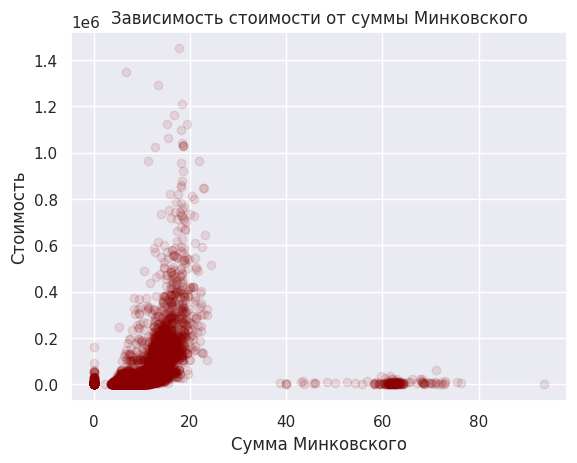

In [34]:
plt.scatter(X_train, y_train, alpha = 0.1, color = "darkred")
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости от суммы Минковского')
plt.show()


(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

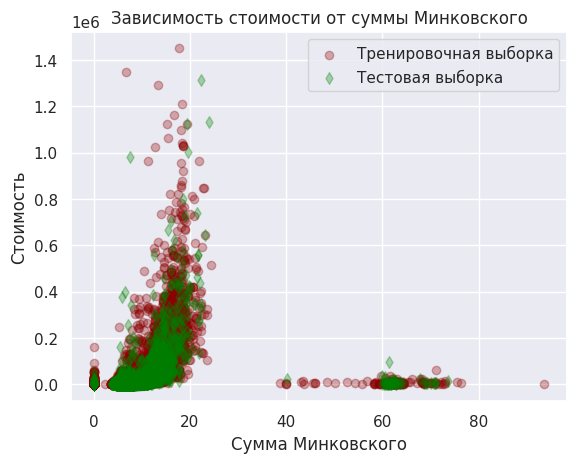

In [35]:
plt.scatter(X_train, y_train, alpha=0.3, color="darkred", label="Тренировочная выборка")
plt.scatter(X_test, y_test, alpha=0.3, color="green", marker='d', label="Тестовая выборка")
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости от суммы Минковского')
plt.legend()
plt.show()


(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train, y_train)
distances, indices = knn.kneighbors(X_test)

nearest_neighbors = X_train[indices]

distances = distances.reshape(-1)

for i in range(len(X_test)):
    print(f"Тестовый бриллиант {i}:")
    print(f"Расстояние до ближайшего соседа: {distances[i]}")
    print(f"Параметры ближайшего соседа: {nearest_neighbors[i]}\n")



Выходные данные были обрезаны до нескольких последних строк (5000).
Тестовый бриллиант 42691:
Расстояние до ближайшего соседа: 6.903024889481912e-06
Параметры ближайшего соседа: [[9.66130372]]

Тестовый бриллиант 42692:
Расстояние до ближайшего соседа: 9.11953270765764e-06
Параметры ближайшего соседа: [[8.73402702]]

Тестовый бриллиант 42693:
Расстояние до ближайшего соседа: 0.00010826062567481642
Параметры ближайшего соседа: [[6.66862563]]

Тестовый бриллиант 42694:
Расстояние до ближайшего соседа: 0.0
Параметры ближайшего соседа: [[6.12609408]]

Тестовый бриллиант 42695:
Расстояние до ближайшего соседа: 7.834144822638223e-06
Параметры ближайшего соседа: [[9.5466968]]

Тестовый бриллиант 42696:
Расстояние до ближайшего соседа: 0.0
Параметры ближайшего соседа: [[6.22415103]]

Тестовый бриллиант 42697:
Расстояние до ближайшего соседа: 1.7286258228388363e-05
Параметры ближайшего соседа: [[6.8340239]]

Тестовый бриллиант 42698:
Расстояние до ближайшего соседа: 1.532980236973458e-06
Параме

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [1]:
# у меня почему-то умирал колаб на этой ячейке и я забил .!.


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(diamonds[['cut', 'color']])
y = diamonds['total_sales_price']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [11]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [12]:
from sklearn.metrics import mean_squared_error as MSE

y_pred = model.predict(X_test)
mse = MSE(y_test, y_pred)
print(mse)

786108199.1075953


In [13]:
X = ohe.fit_transform(diamonds[['cut', 'clarity']])
y = diamonds['total_sales_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = MSE(y_test, y_pred)
print(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


790047904.9151583


Можно было бы перебрать и пары других категориальных признаков. Но в этом особо нет смысла. Видно, что в первый раз ошибка меньше.

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Для выводов можно также построить график важности признаков и посмотреть, какие признаки вносят наибольший вклад в модель. Не особо понимаю как ответ на второй вопрос давать. Ну применили дерево, ошибка большая. Для лучшего решения данной задачи надо было хорошо обработать данные, убрать выбросы. Попробовать другие модели, ансамбли.